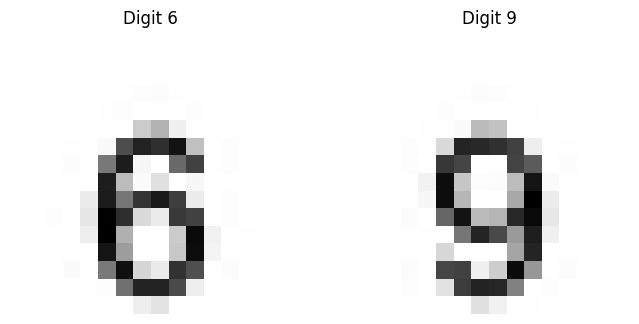

Digit 6 pixel values (0 is black, 255 is white):
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 253 252 254 255 255 255 255 255 255]
 [255 255 255 255 255 254 253 255 255 255 253 255 255 255 255 255]
 [255 255 255 255 254 255 255 204 181 240 255 254 255 255 255 255]
 [255 255 255 254 254 249  82  40  53  26 193 255 253 255 255 255]
 [255 255 255 252 255 124  35 246 255 109  71 255 253 255 255 255]
 [255 255 255 254 255  36 190 251 224 255 247 255 255 255 255 255]
 [255 255 254 255 236  34 122  58  33  68 236 254 253 255 255 255]
 [255 255 253 255 230   8  52 219 235  63  70 255 253 255 255 255]
 [255 255 254 255 238   7 178 255 255 204  16 241 255 254 255 255]
 [255 255 255 255 254  27 160 255 255 200  19 243 255 254 255 255]
 [255 255 255 251 255 126  22 215 234  56  84 255 252 255 255 255]
 [255 255 255

In [18]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

def create_digit_image(digit, font_size=40):
    # Create a larger blank white image
    img = Image.new('L', (50, 50), color=255)  # 'L' mode for grayscale (white background)
    draw = ImageDraw.Draw(img)
    
    # Load the Arial font
    try:
        # Adjust the path to the Arial font if necessary
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        print("Arial font not found. Using default font.")
        font = ImageFont.load_default()

    # Calculate text size and position
    left, top, right, bottom = font.getbbox(digit)
    text_width = right - left
    text_height = bottom - top
    position = ((50 - text_width) // 2, (50 - text_height) // 2)

    # Draw the digit on the image in black
    draw.text(position, digit, fill=0, font=font)  # fill=0 for black text

    # Resize the image to 16x16
    img_resized = img.resize((16, 16), Image.LANCZOS)

    return np.array(img_resized)

# Create images for '6' and '9'
digit_6 = create_digit_image('6')
digit_9 = create_digit_image('9')

# Display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(digit_6, cmap='gray')
ax1.set_title('Digit 6')
ax1.axis('off')
ax2.imshow(digit_9, cmap='gray')
ax2.set_title('Digit 9')
ax2.axis('off')
plt.show()

# Print the pixel values to verify
print("Digit 6 pixel values (0 is black, 255 is white):")
print(digit_6)
print("\nDigit 9 pixel values (0 is black, 255 is white):")
print(digit_9)

In [11]:
num_images = 1000000
random_images = np.random.randint(0, 256, (num_images, 16, 16), dtype=np.uint8)

In [12]:
def euclidean_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def sum_squared_difference(img1, img2):
    return np.sum((img1 - img2) ** 2)

def pearson_correlation(img1, img2):
    return np.corrcoef(img1.flatten(), img2.flatten())[0, 1]

In [13]:
def find_best_match(target, anti_target, random_images, correlation_func, maximize=True):
    best_score = float('-inf') if maximize else float('inf')
    best_image = None
    
    for img in random_images:
        target_score = correlation_func(target, img)
        anti_target_score = correlation_func(anti_target, img)
        score = target_score - anti_target_score if maximize else anti_target_score - target_score
        
        if (maximize and score > best_score) or (not maximize and score < best_score):
            best_score = score
            best_image = img
    
    return best_image, best_score

In [14]:
# Find best matches for each correlation measure
euclidean_6 = find_best_match(digit_6, digit_9, random_images, euclidean_distance, maximize=False)
euclidean_9 = find_best_match(digit_9, digit_6, random_images, euclidean_distance, maximize=False)

In [15]:
ssd_6 = find_best_match(digit_6, digit_9, random_images, sum_squared_difference, maximize=False)
ssd_9 = find_best_match(digit_9, digit_6, random_images, sum_squared_difference, maximize=False)

C:\Users\Sai\AppData\Local\Temp\ipykernel_38584\3253292996.py:8: RuntimeWarning: overflow encountered in scalar subtract
  score = target_score - anti_target_score if maximize else anti_target_score - target_score


In [16]:
pearson_6 = find_best_match(digit_6, digit_9, random_images, pearson_correlation, maximize=True)
pearson_9 = find_best_match(digit_9, digit_6, random_images, pearson_correlation, maximize=True)

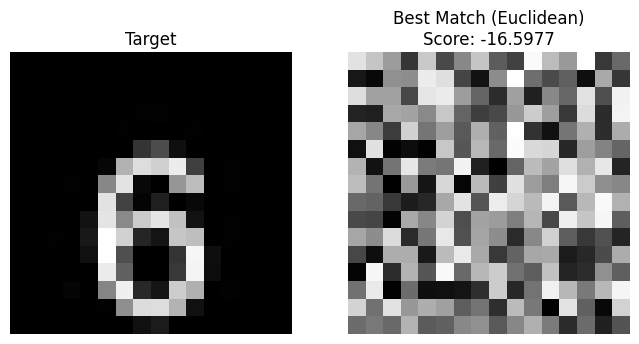

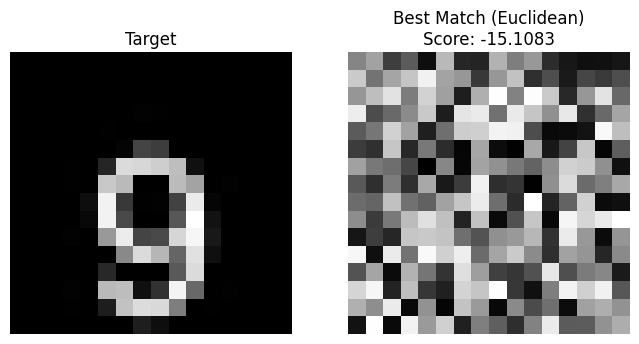

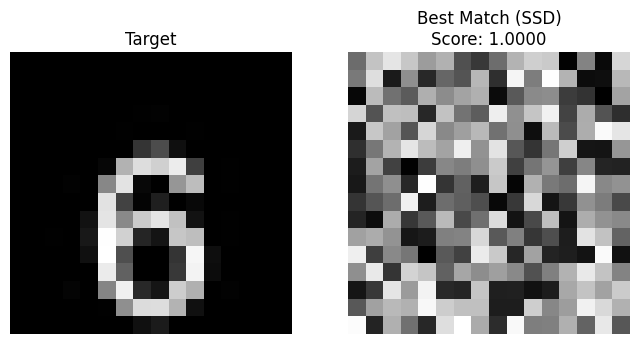

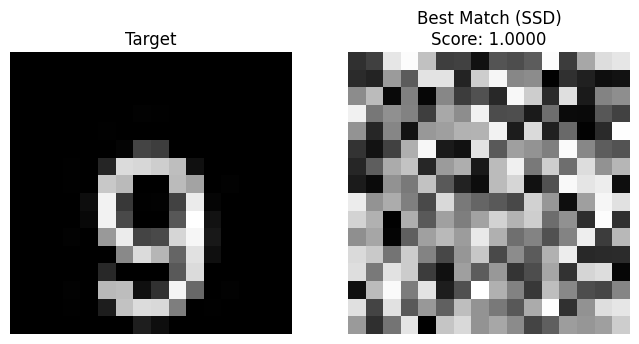

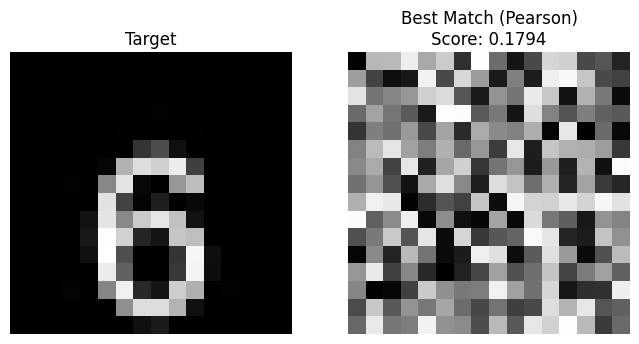

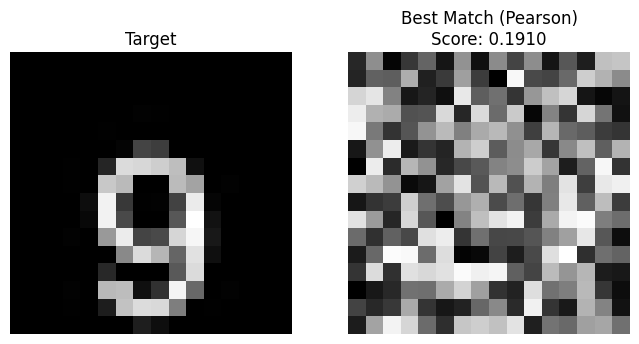

Euclidean Distance Scores - 6: -16.5977, 9: -15.1083
Sum of Squared Differences Scores - 6: 1.0000, 9: 1.0000
Pearson Correlation Scores - 6: 0.1794, 9: 0.1910


In [17]:
def display_results(target, best_match, correlation_name, score):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.imshow(target, cmap='gray_r')
    ax1.set_title('Target')
    ax1.axis('off')
    ax2.imshow(best_match, cmap='gray')
    ax2.set_title(f'Best Match ({correlation_name})\nScore: {score:.4f}')
    ax2.axis('off')
    plt.show()

display_results(digit_6, euclidean_6[0], 'Euclidean', euclidean_6[1])
display_results(digit_9, euclidean_9[0], 'Euclidean', euclidean_9[1])
display_results(digit_6, ssd_6[0], 'SSD', ssd_6[1])
display_results(digit_9, ssd_9[0], 'SSD', ssd_9[1])
display_results(digit_6, pearson_6[0], 'Pearson', pearson_6[1])
display_results(digit_9, pearson_9[0], 'Pearson', pearson_9[1])

print(f"Euclidean Distance Scores - 6: {euclidean_6[1]:.4f}, 9: {euclidean_9[1]:.4f}")
print(f"Sum of Squared Differences Scores - 6: {ssd_6[1]:.4f}, 9: {ssd_9[1]:.4f}")
print(f"Pearson Correlation Scores - 6: {pearson_6[1]:.4f}, 9: {pearson_9[1]:.4f}")